In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing Datasets
train_data = pd.read_csv("D:/New folder (5)/Machine Intelligence/Project/New folder/Train_data.csv")
test_data = pd.read_csv("D:/New folder (5)/Machine Intelligence/Project/New folder/Test_data.csv")

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### Cleaning

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train_data.drop('Item_Identifier',axis=1,inplace=True)
test_data.drop('Item_Identifier',axis=1,inplace=True)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

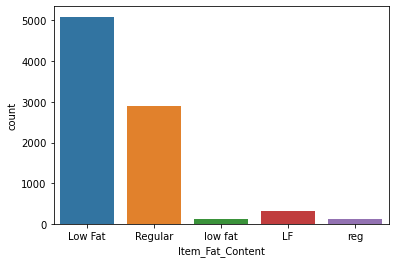

In [8]:
sns.countplot(x='Item_Fat_Content',data=train_data)

In [9]:
#Renaming values for proper ecaluation
def clean_col(col):
    if(col=="low fat" or col=="LF"):
        return "Low Fat"
    elif(col=="reg"):
        return "Regular"
    else:
        return col

In [10]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].apply(clean_col)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

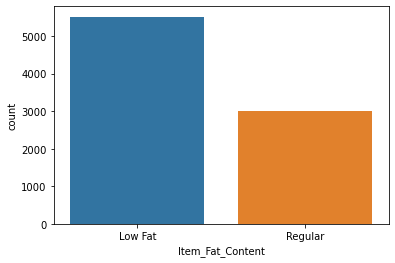

In [11]:
sns.countplot(x='Item_Fat_Content',data=train_data)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

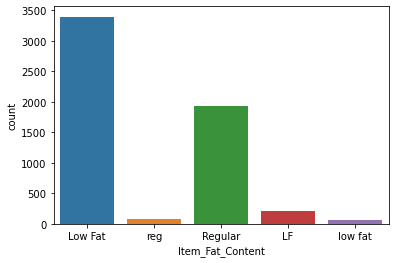

In [12]:
sns.countplot(x='Item_Fat_Content',data=test_data)

In [13]:
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].apply(clean_col)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

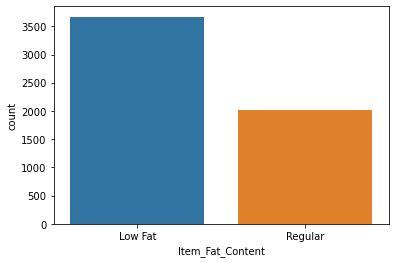

In [14]:
sns.countplot(x='Item_Fat_Content',data=test_data)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

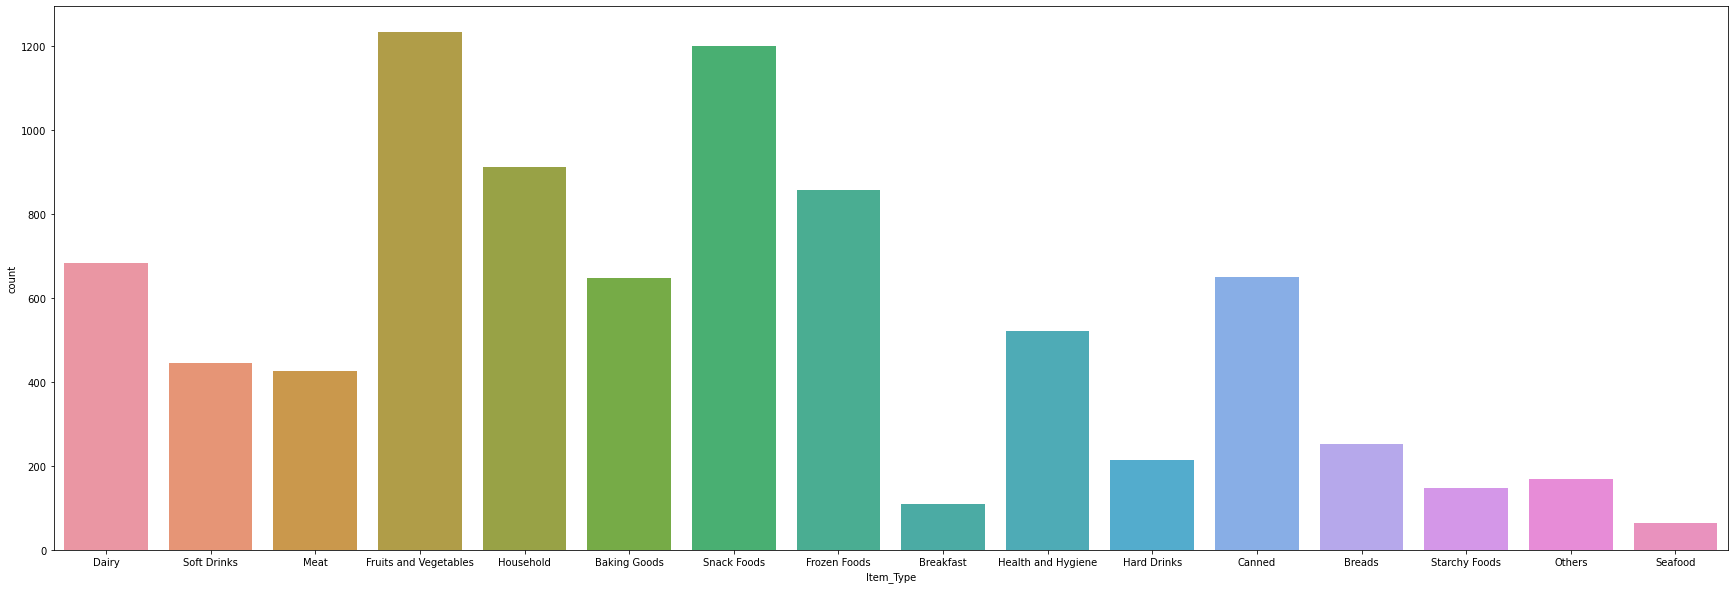

In [15]:
#Counting different products
plt.figure(figsize=(30,10))
sns.countplot(x='Item_Type',data=train_data)

<AxesSubplot:>

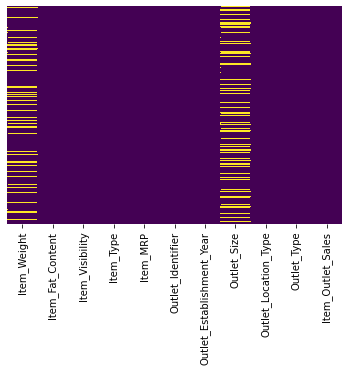

In [16]:
#Checking for null values
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
train_data.drop('Outlet_Identifier',axis=1,inplace=True)
test_data.drop('Outlet_Identifier',axis=1,inplace=True)

<AxesSubplot:>

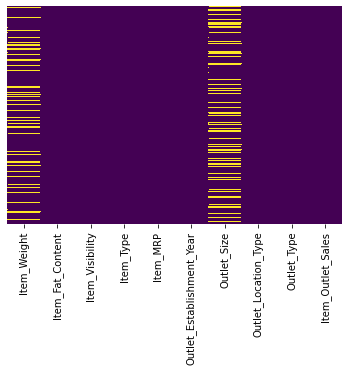

In [18]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Weight'>

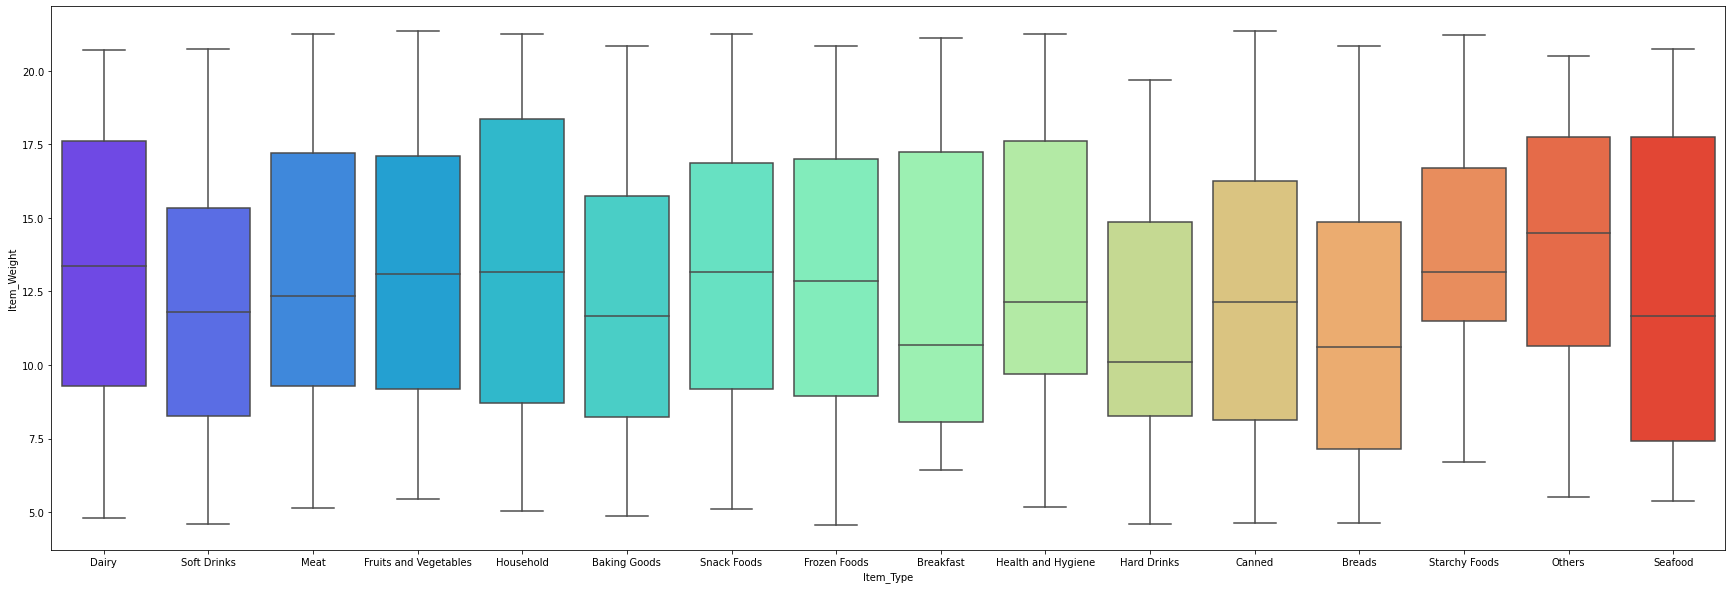

In [19]:
# Checking for outliers
plt.figure(figsize=(30,10))
sns.boxplot(x="Item_Type", y="Item_Weight", data=train_data,palette='rainbow')

In [20]:
train_data.groupby('Item_Type').mean()['Item_Weight']

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [21]:
def fill_null(row):
    if(pd.isnull(row['Item_Weight'])):
        row['Item_Weight']=train_data.groupby('Item_Type').mean()['Item_Weight'][row['Item_Type']]
        return row
    else:
        return row

In [22]:
train_data = train_data.apply(fill_null,axis=1)

<AxesSubplot:>

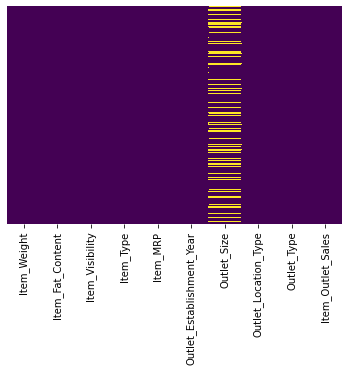

In [23]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

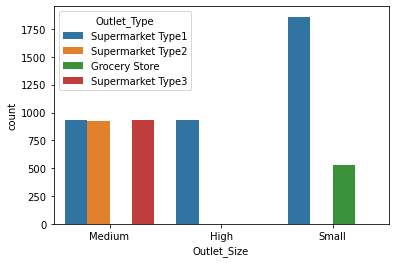

In [24]:
sns.countplot(x='Outlet_Size',data=train_data,hue='Outlet_Type')

In [25]:
def fill_size(row):
    if(pd.isnull(row['Outlet_Size'])):
        if(row['Outlet_Type']=="Supermarket Type1"):
            row['Outlet_Size']="Small"
            return row
        elif(row['Outlet_Type']=="Supermarket Type2"):
            row['Outlet_Size']="Medium"
            return row
        elif(row['Outlet_Type']=="Supermarket Type3"):
            row['Outlet_Size']="Medium"
            return row
        else:
            row['Outlet_Size']="Small"
            return row
    else:
       return row

In [26]:
train_data = train_data.apply(fill_size,axis=1)

<AxesSubplot:>

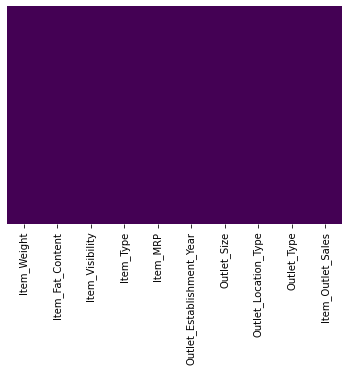

In [27]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

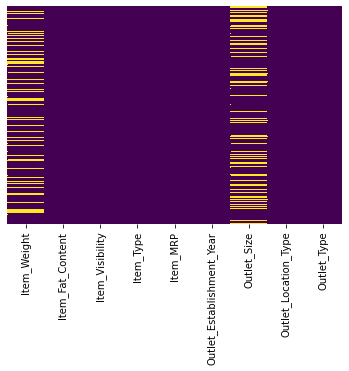

In [28]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
def fill_null2(row):
    if(pd.isnull(row['Item_Weight'])):
        row['Item_Weight']=test_data.groupby('Item_Type').mean()['Item_Weight'][row['Item_Type']]
        return row
    else:
        return row

In [30]:
test_data = test_data.apply(fill_null2,axis=1)

<AxesSubplot:>

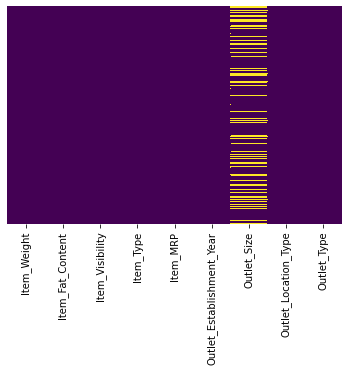

In [31]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

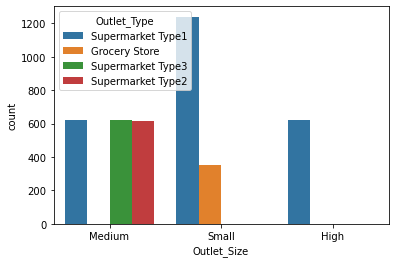

In [32]:
sns.countplot(x='Outlet_Size',data=test_data,hue='Outlet_Type')

In [33]:
def fill_size2(row):
    if(pd.isnull(row['Outlet_Size'])):
        if(row['Outlet_Type']=="Supermarket Type1"):
            row['Outlet_Size']="Small"
            return row
        elif(row['Outlet_Type']=="Supermarket Type2"):
            row['Outlet_Size']="Medium"
            return row
        elif(row['Outlet_Type']=="Supermarket Type3"):
            row['Outlet_Size']="Medium"
            return row
        else:
            row['Outlet_Size']="Small"
            return row
    else:
       return row

In [34]:
test_data = test_data.apply(fill_size2,axis=1)

<AxesSubplot:>

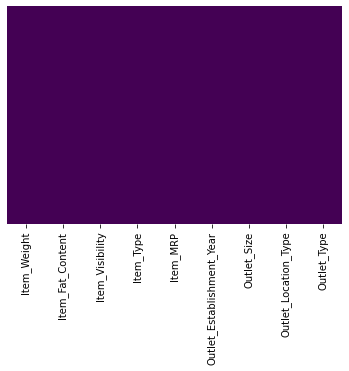

In [35]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
#Splitting the Item_type to different columns
data_types = train_data.dtypes
for cols in train_data.columns:
    if data_types[cols]==data_types['Item_Type']:
        temp = pd.get_dummies(train_data[cols],drop_first=True)
        train_data.drop(cols,axis=1,inplace=True)
        train_data = pd.concat([train_data,temp],axis=1)
#data.head()

In [37]:
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Regular,Breads,Breakfast,Canned,Dairy,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [38]:
train_data.shape

(8523, 28)

In [39]:
data_types = test_data.dtypes
for cols in test_data.columns:
    if data_types[cols]==data_types['Item_Type']:
        temp = pd.get_dummies(test_data[cols],drop_first=True)
        test_data.drop(cols,axis=1,inplace=True)
        test_data = pd.concat([test_data,temp],axis=1)

In [40]:
test_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Regular,Breads,Breakfast,Canned,Dairy,Frozen Foods,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.75000,0.007565,107.8622,1999,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,8.30000,0.038428,87.3198,2007,1,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,14.60000,0.099575,241.7538,1998,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,7.31500,0.015388,155.0340,2007,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
4,12.95504,0.118599,234.2300,1985,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [41]:
test_data.shape

(5681, 27)

# Models

In [46]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()
regr.fit(train_data.drop('Item_Outlet_Sales',axis=1),train_data['Item_Outlet_Sales'])

DecisionTreeRegressor()

In [47]:
# X_train = train_data.drop('Item_Outlet_Sales',axis=1)
# y_train = train_data['Item_Outlet_Sales']
# print("Training Accuracy for Decision Tree regressor :", regr.score(X_train, y_train)*100,"%")

In [48]:
X = train_data.drop('Item_Outlet_Sales',axis=1)
y = train_data['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
predictions = regr.predict(test_data)

In [50]:
pd.Series(predictions)

0       2087.2830
1       1328.2710
2        759.0120
3       2025.3636
4       7170.6660
          ...    
5676    3829.0158
5677    1794.3310
5678     468.7232
5679    7247.2330
5680    1038.6480
Length: 5681, dtype: float64

## Linear Regression
Linear regression is used to predict the relationship between two variables by applying a linear equation to observed data. There are two types of variable, one variable is called an independent variable, and the other is a dependent variable. Linear regression is commonly used for predictive analysis.

In [51]:
lm = LinearRegression()

<IPython.core.display.Javascript object>

In [52]:
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
predictions = lm.predict(X_test)
predictions

array([2494.41825374, 2837.23409095, 3447.65167915, ..., 2025.95397354,
       2826.53952724, 1777.8038662 ])

In [54]:
from sklearn import metrics

In [55]:
metrics.r2_score(y_test,predictions)*100

55.690025773221905

## Decision Tree
Decision trees in Python can be used to solve both classification and regression problems—they are frequently used in determining odds

In [56]:
regr.fit(X,y)

DecisionTreeRegressor()

In [57]:
y_pred = regr.predict(X_test)
y_pred

array([3159.8868, 4103.9912, 3089.9778, ..., 1108.557 , 1155.8288,
       2402.2064])

In [58]:
metrics.r2_score(y_test,y_pred)*100

100.0

## Random forest
Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems.

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0)

In [61]:
regressor.fit(X,y)

RandomForestRegressor(random_state=0)

In [62]:
y_predictions = regressor.predict(X_test)
y_predictions

array([2832.239962, 3723.05373 , 3019.955614, ..., 1413.866248,
       2036.442512, 2303.328442])

In [63]:
metrics.r2_score(y_test,y_predictions)*100

93.86110107694299

# Conclusion

After a whole lot of preprocessiong we were finally able to develop a dataset which was good enough for our model to run. I didn't explain anything step wise but a lot of it is self explanatory. Output might not be same all the time you run the code. It may go up or down. In the real world scenario, we save the model as soon we get the highest accuracy.